<a href="https://colab.research.google.com/github/YatinG021/Sentiment-Analysis-of-Customer-Reviews-/blob/main/Sentiment_Analysis_of_Customer_reviews_from_the_IMDb_Movie_Reviews_Dataset_.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [13]:
# Problem: Sentiment Analysis of customer reviews using traditional NLP techniques
# Dataset: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
# installing kaggle library

! pip install kaggle

In [14]:
# upload kaggle.json file
# configuring the path of kaggle.json file
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/
!chmod 600 ~/.kaggle/kaggle.json

Importing IMBD Dataset of 50K reviews

In [15]:
# API to fetch dataset from kaggle
!kaggle datasets download -d lakshmi25npathi/imdb-dataset-of-50k-movie-reviews

Dataset URL: https://www.kaggle.com/datasets/lakshmi25npathi/imdb-dataset-of-50k-movie-reviews
License(s): other
imdb-dataset-of-50k-movie-reviews.zip: Skipping, found more recently modified local copy (use --force to force download)


In [16]:
# extracting the compressed dataset

from zipfile import ZipFile
dataset = '/content/imdb-dataset-of-50k-movie-reviews.zip'

with ZipFile(dataset,'r') as zip:
  zip.extractall()
  print('The dataset is extracted')

The dataset is extracted


In [17]:
# importing dependencies
import pandas as pd
import re
import nltk
nltk.download('punkt_tab')
from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
from sklearn.model_selection import train_test_split
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import matplotlib.pyplot as plt
import seaborn as sns

[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


In [18]:
import nltk
nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


True

In [19]:
# printing the stopwords in English
print(stopwords.words('english'))

['a', 'about', 'above', 'after', 'again', 'against', 'ain', 'all', 'am', 'an', 'and', 'any', 'are', 'aren', "aren't", 'as', 'at', 'be', 'because', 'been', 'before', 'being', 'below', 'between', 'both', 'but', 'by', 'can', 'couldn', "couldn't", 'd', 'did', 'didn', "didn't", 'do', 'does', 'doesn', "doesn't", 'doing', 'don', "don't", 'down', 'during', 'each', 'few', 'for', 'from', 'further', 'had', 'hadn', "hadn't", 'has', 'hasn', "hasn't", 'have', 'haven', "haven't", 'having', 'he', "he'd", "he'll", 'her', 'here', 'hers', 'herself', "he's", 'him', 'himself', 'his', 'how', 'i', "i'd", 'if', "i'll", "i'm", 'in', 'into', 'is', 'isn', "isn't", 'it', "it'd", "it'll", "it's", 'its', 'itself', "i've", 'just', 'll', 'm', 'ma', 'me', 'mightn', "mightn't", 'more', 'most', 'mustn', "mustn't", 'my', 'myself', 'needn', "needn't", 'no', 'nor', 'not', 'now', 'o', 'of', 'off', 'on', 'once', 'only', 'or', 'other', 'our', 'ours', 'ourselves', 'out', 'over', 'own', 're', 's', 'same', 'shan', "shan't", 'she

Data Processing

In [20]:
# loading the data from csv file to pandas dataframe
data = pd.read_csv('/content/IMDB Dataset.csv')

In [21]:
print(data.info())
print(data.head())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 2 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   review     50000 non-null  object
 1   sentiment  50000 non-null  object
dtypes: object(2)
memory usage: 781.4+ KB
None
                                              review sentiment
0  One of the other reviewers has mentioned that ...  positive
1  A wonderful little production. <br /><br />The...  positive
2  I thought this was a wonderful way to spend ti...  positive
3  Basically there's a family where a little boy ...  negative
4  Petter Mattei's "Love in the Time of Money" is...  positive


In [22]:
def preprocesss_text(text):
    # Remove the HTMl tags and special characters.
    text = re.sub(r'<.*?>', '', text)  # <html> <body> etc
    text = re.sub(r'[^\w\s]', '', text)

    # Convert to lower.
    text = text.lower()

    # Tokenize
    tokens = word_tokenize(text)

    # Remove the stopwords and apply stemming.
    stop_words = set(stopwords.words('english'))
    tokens = [word for word in tokens if word not in stop_words] # Remove stopwords
    stemmer = PorterStemmer()
    tokens = [stemmer.stem(word) for word in tokens] # Applied stemming.

    return ' '.join(tokens)

# Apply preprocessing on the reviews feature
data['cleaned_review'] = data['review'].apply(preprocesss_text)

# Split the data into features and target datasets
X = data['cleaned_review']  # Feature
y = data['sentiment']

In [23]:
# Step 4: Split the dataset into training(80%) and validation(20%) dataset.
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=42)

Accuracy Score: 
 0.8854
Confusion Matrix: 
 [[4304  657]
 [ 489 4550]]
Classification Report: 
               precision    recall  f1-score   support

    negative       0.90      0.87      0.88      4961
    positive       0.87      0.90      0.89      5039

    accuracy                           0.89     10000
   macro avg       0.89      0.89      0.89     10000
weighted avg       0.89      0.89      0.89     10000



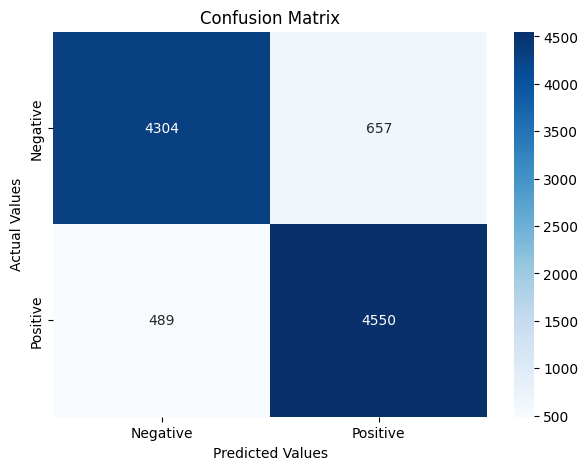

In [24]:
# Step 5: Feature Extraction
tfidf_vectorizer = TfidfVectorizer(max_features=5000)
X_train_tfidf = tfidf_vectorizer.fit_transform(X_train)
X_val_tfidf = tfidf_vectorizer.transform(X_val)

# Step 6: Model Training
model = LogisticRegression()
model.fit(X_train_tfidf, y_train)

# Step 7: Make Prediction and Evaluate.
predictions = model.predict(X_val_tfidf)

accuracy_score = accuracy_score(y_val, predictions)
confusion_matrix = confusion_matrix(y_val, predictions)
classification_report = classification_report(y_val, predictions)

print(f"Accuracy Score: \n {accuracy_score}")
print(f"Confusion Matrix: \n {confusion_matrix}")
print(f"Classification Report: \n {classification_report}")

# Step 8: Visualization
plt.figure(figsize=(7, 5))
sns.heatmap(confusion_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=['Negative','Positive'], yticklabels=['Negative','Positive'])
plt.xlabel('Predicted Values')
plt.ylabel('Actual Values')
plt.title('Confusion Matrix')
plt.show()